In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = '../datasets/data/train_sample.csv'
df = pd.read_csv(filename)

In [3]:
df.columns

Index(['Unnamed: 0', 'srch_id', 'date_time', 'site_id',
       'visitor_location_country_id', 'visitor_hist_starrating',
       'visitor_hist_adr_usd', 'prop_country_id', 'prop_id', 'prop_starrating',
       'prop_review_score', 'prop_brand_bool', 'prop_location_score1',
       'prop_location_score2', 'prop_log_historical_price', 'position',
       'price_usd', 'promotion_flag', 'srch_destination_id',
       'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count',
       'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool',
       'srch_query_affinity_score', 'orig_destination_distance', 'random_bool',
       'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate',
       'comp2_inv', 'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff'

In [4]:
null_counts = df.isnull().sum()
refined_cols = null_counts[null_counts <500000]
refined_cols

Unnamed: 0                          0
srch_id                             0
date_time                           0
site_id                             0
visitor_location_country_id         0
prop_country_id                     0
prop_id                             0
prop_starrating                     0
prop_review_score                1437
prop_brand_bool                     0
prop_location_score1                0
prop_location_score2           218370
prop_log_historical_price           0
position                            0
price_usd                           0
promotion_flag                      0
srch_destination_id                 0
srch_length_of_stay                 0
srch_booking_window                 0
srch_adults_count                   0
srch_children_count                 0
srch_room_count                     0
srch_saturday_night_bool            0
orig_destination_distance      321301
random_bool                         0
click_bool                          0
booking_bool

In [5]:
cols = []
for items in refined_cols.iteritems():
    cols.append(items[0])

In [6]:
df = df.filter(cols, axis=1)
df = df.drop('Unnamed: 0', axis=1)

In [7]:
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,booking_bool
0,1,2013-04-04 08:32:15,12,187,219,10404,4,4.0,1,2.20,...,1,0,4,0,1,1,NaN,1,0,0
1,1,2013-04-04 08:32:15,12,187,219,27348,2,4.0,1,2.83,...,1,0,4,0,1,1,NaN,1,0,0
2,1,2013-04-04 08:32:15,12,187,219,56880,4,4.0,1,2.83,...,1,0,4,0,1,1,NaN,1,0,0
3,1,2013-04-04 08:32:15,12,187,219,68914,2,3.0,1,2.20,...,1,0,4,0,1,1,NaN,1,1,1
4,1,2013-04-04 08:32:15,12,187,219,88127,3,3.0,1,1.39,...,1,0,4,0,1,1,NaN,1,0,0


In [8]:
df.dtypes

srch_id                          int64
date_time                       object
site_id                          int64
visitor_location_country_id      int64
prop_country_id                  int64
prop_id                          int64
prop_starrating                  int64
prop_review_score              float64
prop_brand_bool                  int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                         int64
price_usd                      float64
promotion_flag                   int64
srch_destination_id              int64
srch_length_of_stay              int64
srch_booking_window              int64
srch_adults_count                int64
srch_children_count              int64
srch_room_count                  int64
srch_saturday_night_bool         int64
orig_destination_distance      float64
random_bool                      int64
click_bool                       int64
booking_bool             

In [9]:
df.max()

srch_id                                     665574
date_time                      2013-06-30 23:58:24
site_id                                         34
visitor_location_country_id                    231
prop_country_id                                230
prop_id                                     140821
prop_starrating                                  5
prop_review_score                                5
prop_brand_bool                                  1
prop_location_score1                          6.98
prop_location_score2                             1
prop_log_historical_price                     6.21
position                                        40
price_usd                              7.04312e+06
promotion_flag                                   1
srch_destination_id                          28416
srch_length_of_stay                             58
srch_booking_window                            498
srch_adults_count                                9
srch_children_count            

### maybe change dtypes to float16 or int16 except some

In [10]:
df.isnull().sum()

srch_id                             0
date_time                           0
site_id                             0
visitor_location_country_id         0
prop_country_id                     0
prop_id                             0
prop_starrating                     0
prop_review_score                1437
prop_brand_bool                     0
prop_location_score1                0
prop_location_score2           218370
prop_log_historical_price           0
position                            0
price_usd                           0
promotion_flag                      0
srch_destination_id                 0
srch_length_of_stay                 0
srch_booking_window                 0
srch_adults_count                   0
srch_children_count                 0
srch_room_count                     0
srch_saturday_night_bool            0
orig_destination_distance      321301
random_bool                         0
click_bool                          0
booking_bool                        0
dtype: int64

### maybe do seperate analysis for `prop_location_score2` and `orig_destination_distance` but drop for now

In [11]:
df = df.drop(['prop_location_score2','orig_destination_distance']  , axis=1)

In [12]:
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool
0,1,2013-04-04 08:32:15,12,187,219,10404,4,4.0,1,2.20,...,23246,1,0,4,0,1,1,1,0,0
1,1,2013-04-04 08:32:15,12,187,219,27348,2,4.0,1,2.83,...,23246,1,0,4,0,1,1,1,0,0
2,1,2013-04-04 08:32:15,12,187,219,56880,4,4.0,1,2.83,...,23246,1,0,4,0,1,1,1,0,0
3,1,2013-04-04 08:32:15,12,187,219,68914,2,3.0,1,2.20,...,23246,1,0,4,0,1,1,1,1,1
4,1,2013-04-04 08:32:15,12,187,219,88127,3,3.0,1,1.39,...,23246,1,0,4,0,1,1,1,0,0


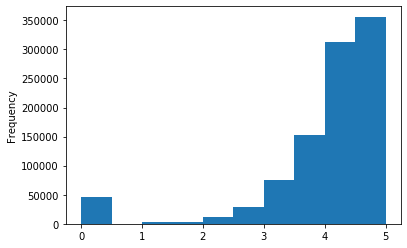

In [13]:
df['prop_review_score'].plot.hist()

### fill prop_review_score with median 

In [14]:
df['prop_review_score'].dtype

dtype('float64')

In [15]:
pd.to_numeric(df['prop_review_score'], errors='coerce')

0         4.0
1         4.0
2         4.0
3         3.0
4         3.0
         ... 
991748    4.5
991749    4.5
991750    4.5
991751    4.0
991752    0.0
Name: prop_review_score, Length: 991753, dtype: float64

In [16]:
# def custom_func(num_str):
#     if pd.isnull(num_str):
#         return num_str
# abc = df['prop_review_score'].map(custom_func)

In [17]:
df['prop_review_score'].fillna((df['prop_review_score'].mean()), inplace=True)

In [18]:
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool
0,1,2013-04-04 08:32:15,12,187,219,10404,4,4.0,1,2.20,...,23246,1,0,4,0,1,1,1,0,0
1,1,2013-04-04 08:32:15,12,187,219,27348,2,4.0,1,2.83,...,23246,1,0,4,0,1,1,1,0,0
2,1,2013-04-04 08:32:15,12,187,219,56880,4,4.0,1,2.83,...,23246,1,0,4,0,1,1,1,0,0
3,1,2013-04-04 08:32:15,12,187,219,68914,2,3.0,1,2.20,...,23246,1,0,4,0,1,1,1,1,1
4,1,2013-04-04 08:32:15,12,187,219,88127,3,3.0,1,1.39,...,23246,1,0,4,0,1,1,1,0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991753 entries, 0 to 991752
Data columns (total 24 columns):
srch_id                        991753 non-null int64
date_time                      991753 non-null object
site_id                        991753 non-null int64
visitor_location_country_id    991753 non-null int64
prop_country_id                991753 non-null int64
prop_id                        991753 non-null int64
prop_starrating                991753 non-null int64
prop_review_score              991753 non-null float64
prop_brand_bool                991753 non-null int64
prop_location_score1           991753 non-null float64
prop_log_historical_price      991753 non-null float64
position                       991753 non-null int64
price_usd                      991753 non-null float64
promotion_flag                 991753 non-null int64
srch_destination_id            991753 non-null int64
srch_length_of_stay            991753 non-null int64
srch_booking_window            9

In [20]:
df['prop_review_score'].values

array([4. , 4. , 4. , ..., 4.5, 4. , 0. ])

In [21]:
to_sns = df.drop('date_time', axis=1)

In [22]:
# fig, ax = plt.subplots(figsize=(20,8))         # Sample figsize in inches
# sns.heatmap(to_sns)

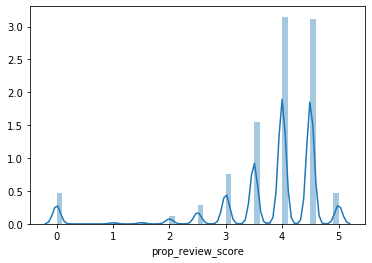

In [23]:
sns.distplot(to_sns['prop_review_score'])

In [24]:
# ax = sns.regplot(x=df['price_usd'], y=df['click_bool'])

In [ ]:
ax = sns.scatterplot(x=df['prop_review_score'], y=df['price_usd'])

In [ ]:
ax = sns.scatterplot(x=df['srch_length_of_stay'], y=df['price_usd'])

In [ ]:
df['price_usd'].plot.box()

In [ ]:
df['price_usd'].max(), df['price_usd'].min(), df['price_usd'].mean(), df['price_usd'].median()

In [ ]:
price = df[['visitor_location_country_id', 'prop_country_id', 'prop_starrating', 'prop_id', 'srch_length_of_stay', 'position', 'promotion_flag', 'price_usd']][df['price_usd'] > 10000]

In [ ]:
price.head(30)

In [ ]:
price.describe()

In [ ]:
price.info()

In [ ]:
df['prop_country_id'].unique()

In [ ]:
len(df['prop_id'].unique())

In [ ]:
price['prop_id'].unique()

In [ ]:
# ax = sns.swarmplot(x='srch_length_of_stay', y='price_usd', data=df)

In [ ]:
df.groupby("srch_length_of_stay")['price_usd'].max()

In [ ]:
df.groupby("srch_length_of_stay")['price_usd'].min()

### something fishy here

In [ ]:
df['price_usd'].plot.hist()

In [ ]:
df.srch_length_of_stay.unique()

In [ ]:
df.describe()

In [ ]:
df.columns